In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


array([[<AxesSubplot:xlabel='1.03850160414', ylabel='1.03850160414'>,
        <AxesSubplot:xlabel='0.899865270298', ylabel='1.03850160414'>,
        <AxesSubplot:xlabel='0.835052554063', ylabel='1.03850160414'>,
        <AxesSubplot:xlabel='-0.971527591698', ylabel='1.03850160414'>],
       [<AxesSubplot:xlabel='1.03850160414', ylabel='0.899865270298'>,
        <AxesSubplot:xlabel='0.899865270298', ylabel='0.899865270298'>,
        <AxesSubplot:xlabel='0.835052554063', ylabel='0.899865270298'>,
        <AxesSubplot:xlabel='-0.971527591698', ylabel='0.899865270298'>],
       [<AxesSubplot:xlabel='1.03850160414', ylabel='0.835052554063'>,
        <AxesSubplot:xlabel='0.899865270298', ylabel='0.835052554063'>,
        <AxesSubplot:xlabel='0.835052554063', ylabel='0.835052554063'>,
        <AxesSubplot:xlabel='-0.971527591698', ylabel='0.835052554063'>],
       [<AxesSubplot:xlabel='1.03850160414', ylabel='-0.971527591698'>,
        <AxesSubplot:xlabel='0.899865270298', ylabel='-0.97152759

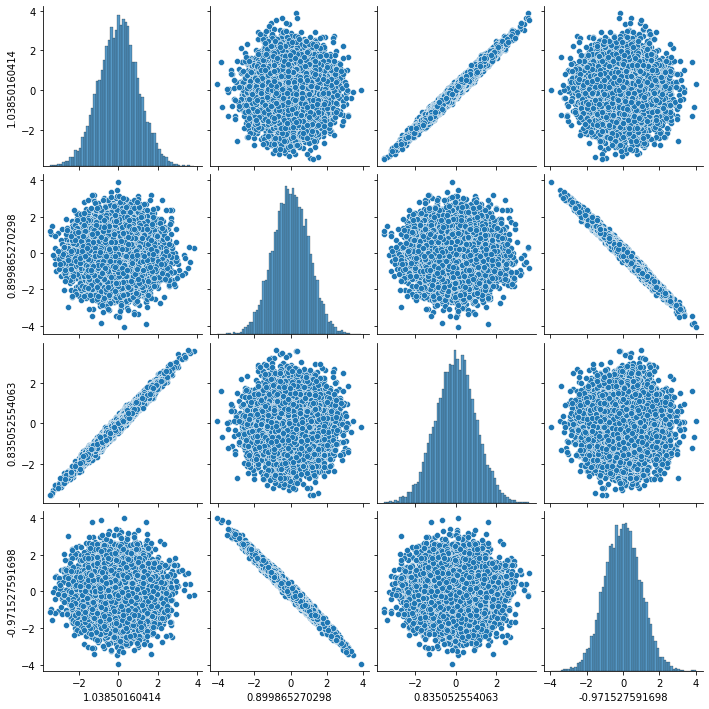

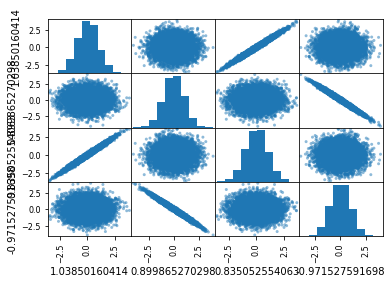

In [6]:

df1 = pd.read_csv('../Lab2_Data/DF1', index_col=0)

# Problem 1

# section 1
sns.pairplot(df1)
pd.plotting.scatter_matrix(df1)


In [7]:

# section 2
print(df1.cov())

# diagonal is correlation between each column and itself so corr coeff = 1
# |corr coeff| ~= 1 corresponds to linear looking scatter plot
# |corr coeff| ~= 0 corresponds to the random circle scatter plot without any trend

                 1.03850160414  0.899865270298  0.835052554063  \
1.03850160414         1.001552       -0.004104        0.991638   
0.899865270298       -0.004104        1.005400       -0.004173   
0.835052554063        0.991638       -0.004173        1.001620   
-0.971527591698       0.004225       -0.995470        0.004161   

                 -0.971527591698  
1.03850160414           0.004225  
0.899865270298         -0.995470  
0.835052554063          0.004161  
-0.971527591698         1.005176  


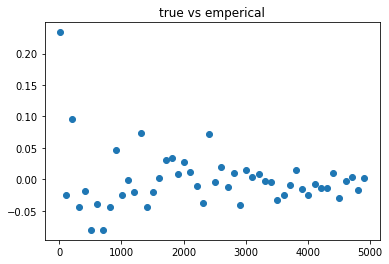

In [8]:
import matplotlib.pyplot as plt

mean_mat = [0, 0, 0]
cov_mat = [ [1, 0, 0],
            [0, 1, 0.8],
            [0, 0.8, 1]]

# mulgaus_1000 = np.random.multivariate_normal(mean_mat, cov_mat, 1000)

# sample_cov1000 = np.cov(mulgaus_1000, rowvar=False)
# print('sample cov 1000:\n', sample_cov1000)
samp_covs = []
num_list = []
nsamples = 10
while nsamples < 5000:
   mulgaus = np.random.multivariate_normal(mean_mat, cov_mat, nsamples)
   samp_cov = np.cov(mulgaus, rowvar=False)
   samp_covs.append(samp_cov[1][2]-0.8)
   num_list.append(nsamples)
   # print('sample cov of {0}:\n{1}'.format(nsamples, samp_cov))
   nsamples += 100

plt.scatter(num_list, samp_covs)
plt.title('true vs emperical')
plt.show()


[[2.  0.5]
 [0.5 2. ]]


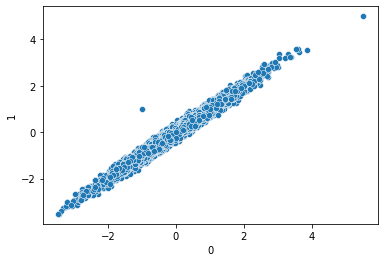

In [5]:

df2 = pd.read_csv('Lab2_Data/DF2', index_col=0)
sns.scatterplot(data=df2, x='0', y='1')
q = np.array([[2, 0.5], [0.5, 2]])

cov matrix: [[1.00464777 0.9942424 ]
 [0.9942424  1.00415964]]
[[ 0.70719357 -0.70701999]
 [ 0.70701999  0.70719357]]
eig_vect transpose
 [[ 0.70719357  0.70701999]
 [-0.70701999  0.70719357]]
Q
 [[ 0.99978417 -0.07126984]
 [ 0.99953877  0.07128734]]
Q-1
 [[ 0.50023071  0.50010793]
 [-7.01386812  7.01559009]]
test z [[1.00464777 0.9942424 ]
 [0.9942424  1.00415964]]
Q_inv [[ 0.50023071  0.50010793]
 [-7.01386812  7.01559009]]
expected z:
 [[ 0.50023071  0.50010793]
 [-7.01386812  7.01559009]]
(-1,1) transformed:  [[-1.22780900e-04]
 [ 1.40294582e+01]]
(5.5,5) transformed:  [[ 5.25180851]
 [-3.49832423]]
y cov
 [[ 1.00000000e+00 -4.13612761e-15]
 [-4.13612761e-15  1.00000000e+00]]
(2, 10000)


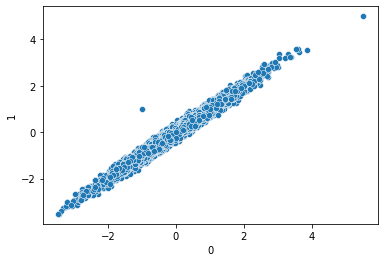

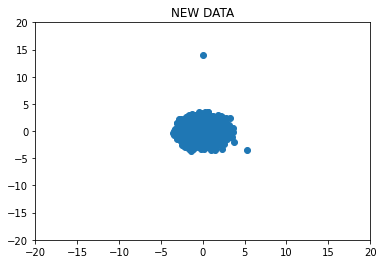

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

#Problem 2
df2 = pd.read_csv("../Lab2_Data/DF2", index_col=0)
sns.scatterplot(data=df2, x='0', y='1')

cov_matrix = np.cov(df2, rowvar=False)
print("cov matrix:", cov_matrix)
eig_vals , eig_vect = np.linalg.eig(cov_matrix)
print(eig_vect)
print("eig_vect transpose\n", eig_vect.T)
# Z = QQT = WVWT = W V1/2 V1/2 WT
# Q = eig_vect * eig_vals^1/2
sq_eig_vals = np.sqrt(np.diag(eig_vals))
Q = eig_vect @ sq_eig_vals
print("Q\n", Q)
q_inv = np.linalg.inv(Q)
print("Q-1\n", q_inv)
test_z = Q @ Q.T
print('test z', test_z)
Q_inv = np.linalg.inv(Q)
print('Q_inv', Q_inv)
expected_z = Q_inv @ np.matrix([[1, 0], [0, 1]])
print('expected z:\n', expected_z)


df_feature1 = df2.iloc[:, 0].tolist()
df_feature2 = df2.iloc[:, 1].tolist()
z = np.matrix([df_feature1, df_feature2])
z_outlier1 = np.matrix([[-1],[1]])
z_outlier2 = np.matrix([[5.5],[5]])
y_outlier1  = Q_inv @ z_outlier1
y_outlier2 = Q_inv @ z_outlier2
print("(-1,1) transformed: ", y_outlier1)
print("(5.5,5) transformed: ", y_outlier2)
# y_outlier1 = np.linalg.inv(np.sqrt(np.diag(eig_vals))) @ y_outlier1
# y_outlier2 = np.linalg.inv(np.sqrt(np.diag(eig_vals))) @ y_outlier2
y = Q_inv @ z
print('y cov\n',np.cov(y))
# y = np.linalg.inv(np.sqrt(np.diag(eig_vals))) @ y
print(y.shape)
plot.figure()
plot.title("NEW DATA")
plot.xlim(-20,20)
plot.ylim(-20,20)
# plot.axes().set_aspect('auto')
# print(y[0,:].tolist()[0])
# sns.scatterplot(data=y, x=y[0,:].tolist()[0], y = y[1,:].tolist()[0])
plot.scatter(x=y[0,:].tolist()[0], y = y[1,:].tolist()[0])
plot.show()

In [39]:
import sys
import glob
import os

def topknames():
    instr = input('k year')
    topk, year = instr.split()
    namesfromyr = pd.read_csv('Names/yob' + str(year) + '.txt')
    # ranked = namesfromyr.sort_values(by=[2])
    krow = namesfromyr.iloc[0:int(topk)]
    print(krow)

# part b
def allnames():
    folder_path = '../Names/'
    input_name = input('Name:')
    frequency = 0
    for filename in glob.glob(os.path.join(folder_path, '*.txt')):
        df = pd.read_csv(filename, index_col=None, header=None)
        totalfreq = 0
        for name in df.iterrows():
            totalfreq += name[1][2]
            if (name[1][0] == input_name):
                frequency += name[1][2]
        rel_freq = frequency * 1.0 / totalfreq
        print('relative freq in {} is {}'.format(filename, rel_freq))
    print(frequency)

# part c
def popnamechange():
    names = []
    folder_path = '../Names/'
    input_name = input('Name:')
    frequency = 0
    for filename in glob.glob(os.path.join(folder_path, '*.txt')):
        df = pd.read_csv(filename, index_col=None, header=None)
        totalfreq = 0
        for name in df.iterrows():
            totalfreq += name[1][2]
            if (name[1][0] == input_name):
                frequency += name[1][2]
        rel_freq = frequency * 1.0 / totalfreq
        print('relative freq in {} is {}'.format(filename, rel_freq))
    print(frequency)

def main():
    # topknames()
    # allnames()
    popnamechange()


if __name__ == '__main__':
    main()

relative freq in ./Names/yob1981.txt is 0.0032116001563587833
relative freq in ./Names/yob1998.txt is 0.004775195097292288
relative freq in ./Names/yob1944.txt is 0.029843460415245368
relative freq in ./Names/yob1972.txt is 0.029932219455020247
relative freq in ./Names/yob1914.txt is 0.09854941485887773
relative freq in ./Names/yob1970.txt is 0.044037011034405917
relative freq in ./Names/yob1964.txt is 0.05143994553538567
relative freq in ./Names/yob1980.txt is 0.06141667126386054
relative freq in ./Names/yob1974.txt is 0.07344919467770994
relative freq in ./Names/yob2011.txt is 0.061950247294505476
relative freq in ./Names/yob1948.txt is 0.08539163043664025
relative freq in ./Names/yob1946.txt is 0.11344292547865575
relative freq in ./Names/yob1953.txt is 0.11083907660452477
relative freq in ./Names/yob1896.txt is 1.233125213295066
relative freq in ./Names/yob1951.txt is 0.13760953610872337
relative freq in ./Names/yob1994.txt is 0.13842039963976832
relative freq in ./Names/yob1978.tx

Lasso picked 110 variables and eliminated the other 178 variables


ModuleNotFoundError: No module named 'xgboost'

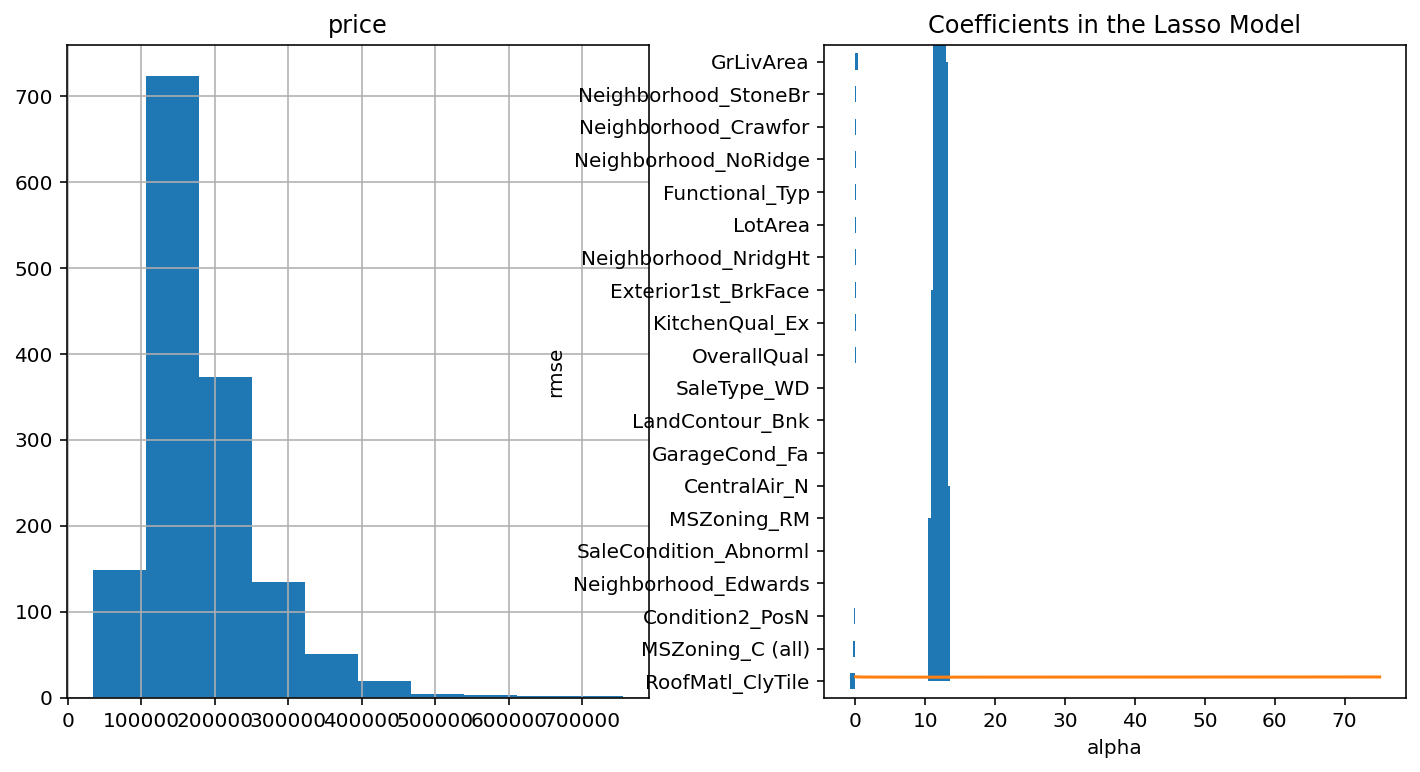

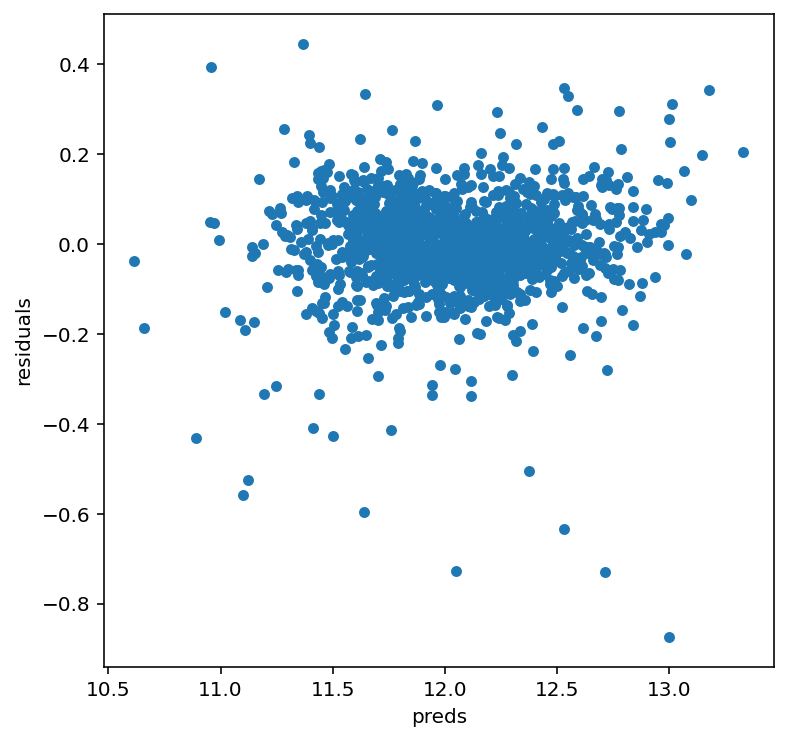

In [1]:
# Q4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train.head()

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")
preds = 0.7*lasso_preds + 0.3*xgb_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train = StandardScaler().fit_transform(X_train)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)
X_tr.shape
X_tr
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")
model.summary()
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))
pd.Series(model.predict(X_val)[:,0]).hist()